# Neural Nets

### The Data
We will use the popular Boston dataset from the MASS package, which describes some features for houses in Boston in 1978.

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per 10,000 dollars
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

We will be trying to predict the Median Value MEDV

In [2]:
library(MASS)
library(caTools)
library(neuralnet)
library(ggplot2)

In [4]:
set.seed(101)
data <- Boston

In [5]:
str(data)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [6]:
summary(data)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [7]:
head(data)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [8]:
any(is.na(data))

[1] FALSE

### Neural Net Model
#### Training the Model

In [9]:
maxs <- apply(data, 2, max) 
mins <- apply(data, 2, min)

In [10]:
maxs

crim       zn    indus     chas      nox       rm      age      dis 
 88.9762 100.0000  27.7400   1.0000   0.8710   8.7800 100.0000  12.1265 
     rad      tax  ptratio    black    lstat     medv 
 24.0000 711.0000  22.0000 396.9000  37.9700  50.0000

In [11]:
mins

crim        zn     indus      chas       nox        rm       age       dis 
  0.00632   0.00000   0.46000   0.00000   0.38500   3.56100   2.90000   1.12960 
      rad       tax   ptratio     black     lstat      medv 
  1.00000 187.00000  12.60000   0.32000   1.73000   5.00000

In [12]:
scaled <- as.data.frame(scale(data, center = mins, scale = maxs - mins))

In [13]:
head(scaled)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.0000000000,0.18,0.06781525,0,0.3148148,0.5775053,0.6416066,0.2692031,0.00000000,0.20801527,0.2872340,1.0000000,0.08967991,0.4222222
0.0002359225,0.00,0.24230205,0,0.1728395,0.5479977,0.7826982,0.3489620,0.04347826,0.10496183,0.5531915,1.0000000,0.20447020,0.3688889
0.0002356977,0.00,0.24230205,0,0.1728395,0.6943859,0.5993821,0.3489620,0.04347826,0.10496183,0.5531915,0.9897373,0.06346578,0.6600000
0.0002927957,0.00,0.06304985,0,0.1502058,0.6585553,0.4418126,0.4485446,0.08695652,0.06679389,0.6489362,0.9942761,0.03338852,0.6311111
0.0007050701,0.00,0.06304985,0,0.1502058,0.6871048,0.5283213,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775,0.6933333
0.0002644715,0.00,0.06304985,0,0.1502058,0.5497222,0.5746653,0.4485446,0.08695652,0.06679389,0.6489362,0.9929901,0.09602649,0.5266667


### Train and Test Sets


In [14]:
split = sample.split(scaled$medv, SplitRatio = 0.70)

train = subset(scaled, split == TRUE)
test = subset(scaled, split == FALSE)

### Training the Model

In [15]:
# Get column names
n <- names(train)

In [16]:
n

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [17]:
# Paste together
f <- as.formula(paste("medv ~", paste(n[!n %in% "medv"], collapse = " + ")))

In [18]:
f

medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

In [22]:
nn <- neuralnet(f,data=train,hidden=c(5,3),linear.output=TRUE)

### Neural Net Visualization

In [23]:
plot(nn)

### Predictions using the Model

In [24]:
# Compute Predictions off Test Set
predicted.nn.values <- compute(nn,test[1:13])

In [25]:
# Its a list returned
str(predicted.nn.values)

List of 2
 $ neurons   :List of 3
  ..$ : num [1:139, 1:14] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "1" "2" "8" "9" ...
  .. .. ..$ : chr [1:14] "" "crim" "zn" "indus" ...
  ..$ : num [1:139, 1:6] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "1" "2" "8" "9" ...
  .. .. ..$ : NULL
  ..$ : num [1:139, 1:4] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "1" "2" "8" "9" ...
  .. .. ..$ : NULL
 $ net.result: num [1:139, 1] 0.55 0.389 0.301 0.229 0.309 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:139] "1" "2" "8" "9" ...
  .. ..$ : NULL


In [27]:
 #Convert back to non-scaled predictions
true.predictions <- predicted.nn.values$net.result*(max(data$medv)-min(data$medv))+min(data$medv)


In [28]:
# Convert the test data
test.r <- (test$medv)*(max(data$medv)-min(data$medv))+min(data$medv)

In [29]:
# Check the Mean Squared Error
MSE.nn <- sum((test.r - true.predictions)^2)/nrow(test)

In [30]:
MSE.nn

[1] 12.53272

### Visualize Error

In [31]:
error.df <- data.frame(test.r,true.predictions)

In [32]:
head(error.df)

,test.r,true.predictions
1,24.0,29.74888
2,21.6,22.48640
8,27.1,18.55693
9,16.5,15.29231
11,15.0,18.92131
12,18.9,19.38084


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


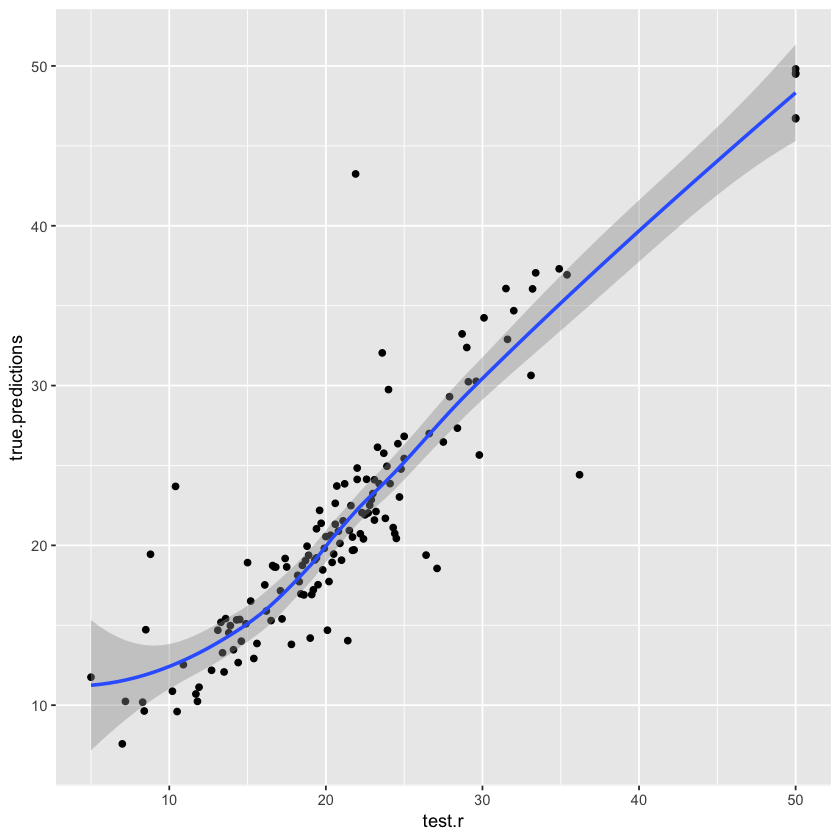

In [33]:
ggplot(error.df,aes(x=test.r,y=true.predictions)) + geom_point() + stat_smooth()